# Symbolically Understanding Christoffel Symbol and Riemann Curvature Tensor using EinsteinPy

In [1]:
import sympy
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

sympy.init_printing()  # enables the best printing available in an environment

### Defining the metric tensor for 3d spherical coordinates

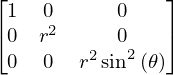

In [2]:
syms = sympy.symbols('r theta phi')
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
metric[0][0] = 1
metric[1][1] = syms[0]**2
metric[2][2] = (syms[0]**2)*(sympy.sin(syms[1])**2)
# creating metric object
m_obj = MetricTensor(metric, syms)
m_obj.tensor()

### Calculating the christoffel symbols

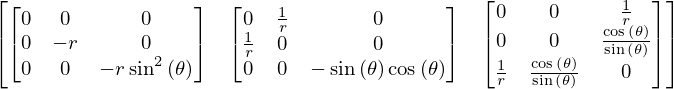

In [3]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.tensor()

In [4]:
ch.tensor()[1,1,0]

### Calculating the Riemann Curvature tensor

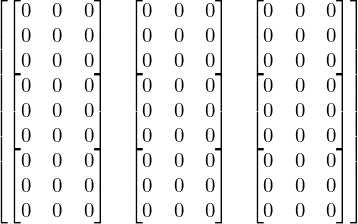

In [5]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

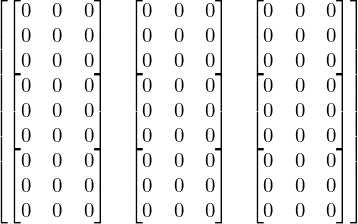

In [6]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor()

### Calculating the christoffel symbols for Schwarzschild Spacetime Metric
  - The expressions are unsimplified

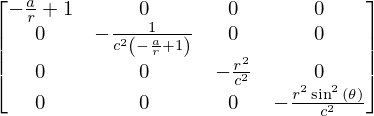

In [7]:
syms = sympy.symbols("t r theta phi")
G, M, c, a = sympy.symbols("G M c a")
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = 1 - (a / syms[1])
list2d[1][1] = -1 / ((1 - (a / syms[1])) * (c ** 2))
list2d[2][2] = -1 * (syms[1] ** 2) / (c ** 2)
list2d[3][3] = -1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2) / (c ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()

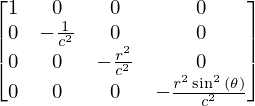

In [8]:
# single substitution
subs1 = sch.subs(a,0)
subs1.tensor()

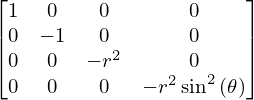

In [9]:
# multiple substitution
subs2 = sch.subs([(a,0), (c,1)])
subs2.tensor()

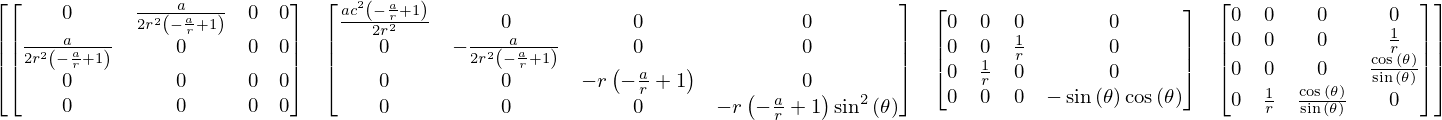

In [10]:
sch_ch = ChristoffelSymbols.from_metric(sch)
sch_ch.tensor()

### Calculating the simplified expressions

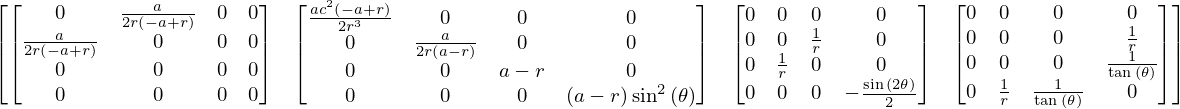

In [11]:
simplified = sch_ch.simplify()
simplified